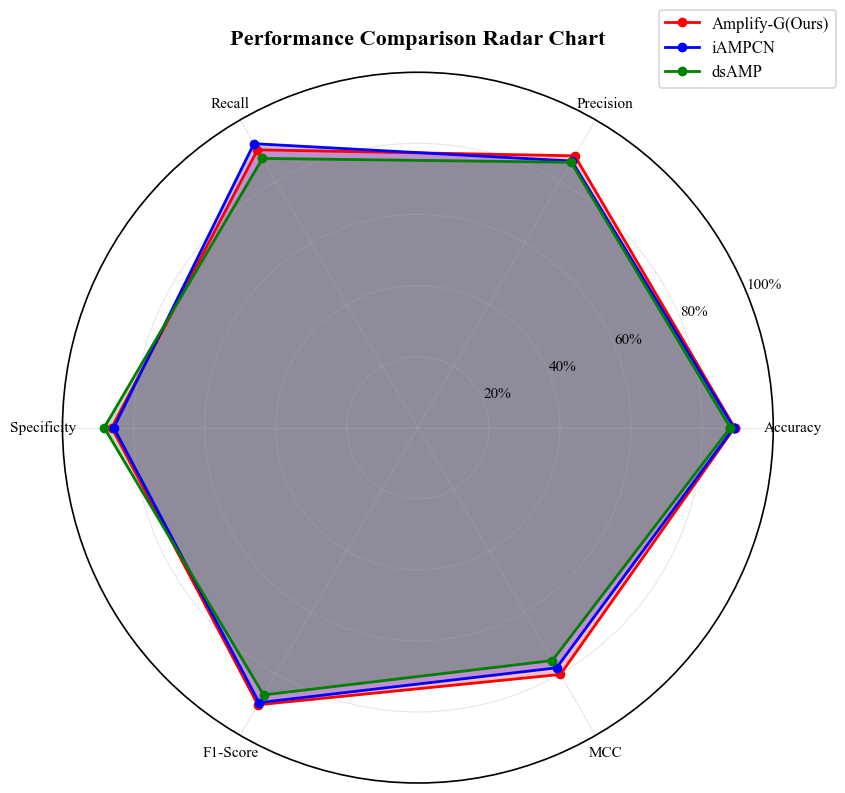

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['Arial']

def plot_radar_chart():
    # 指标名称
    categories = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'MCC']
    
    # 数据（需要转换为0-1范围）
    your_scores = [89.12/100, 88.32/100, 90.28/100, 86.15/100, 90.06/100, 80.20/100]
    iampcn_scores = [88.94/100, 86.63/100, 92.27/100, 85.57/100, 89.36/100, 78.05/100]
    dsamp_scores = [87.92/100, 86.22/100, 87.48/100, 88.28/100, 86.85/100, 75.68/100]
    
    # 角度计算
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # 闭合图形
    
    # 数据闭合
    your_scores += your_scores[:1]
    iampcn_scores += iampcn_scores[:1]
    dsamp_scores += dsamp_scores[:1]
    
    # 创建雷达图
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection='polar'))
    
    # 绘制数据
    ax.plot(angles, your_scores, 'o-', linewidth=2, label='Amplify-G(Ours)', color='red')
    ax.fill(angles, your_scores, alpha=0.25, color='red')
    
    ax.plot(angles, iampcn_scores, 'o-', linewidth=2, label='iAMPCN', color='blue')
    ax.fill(angles, iampcn_scores, alpha=0.25, color='blue')
    
    ax.plot(angles, dsamp_scores, 'o-', linewidth=2, label='dsAMP', color='green')
    ax.fill(angles, dsamp_scores, alpha=0.25, color='green')
    
    # 设置标签
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # 设置范围
    ax.set_ylim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])
    
    # 添加网格
    ax.grid(True)
    
    # 添加图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    
    # 标题
    plt.title('Performance Comparison Radar Chart', size=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()

# 调用函数
plot_radar_chart()

=== 模型性能统计分析 ===
Ours: Mean=87.95±3.82
iAMPCN: Mean=87.47±4.79
dsAMP: Mean=85.83±4.54
Random Forest: Mean=86.13±4.84
SVM: Mean=84.15±7.24
iAMP-CA2L: Mean=79.80±3.77

排序 (平均性能):
1. Ours: 87.95%
2. iAMPCN: 87.47%
3. Random Forest: 86.13%
4. dsAMP: 85.83%
5. SVM: 84.15%
6. iAMP-CA2L: 79.80%


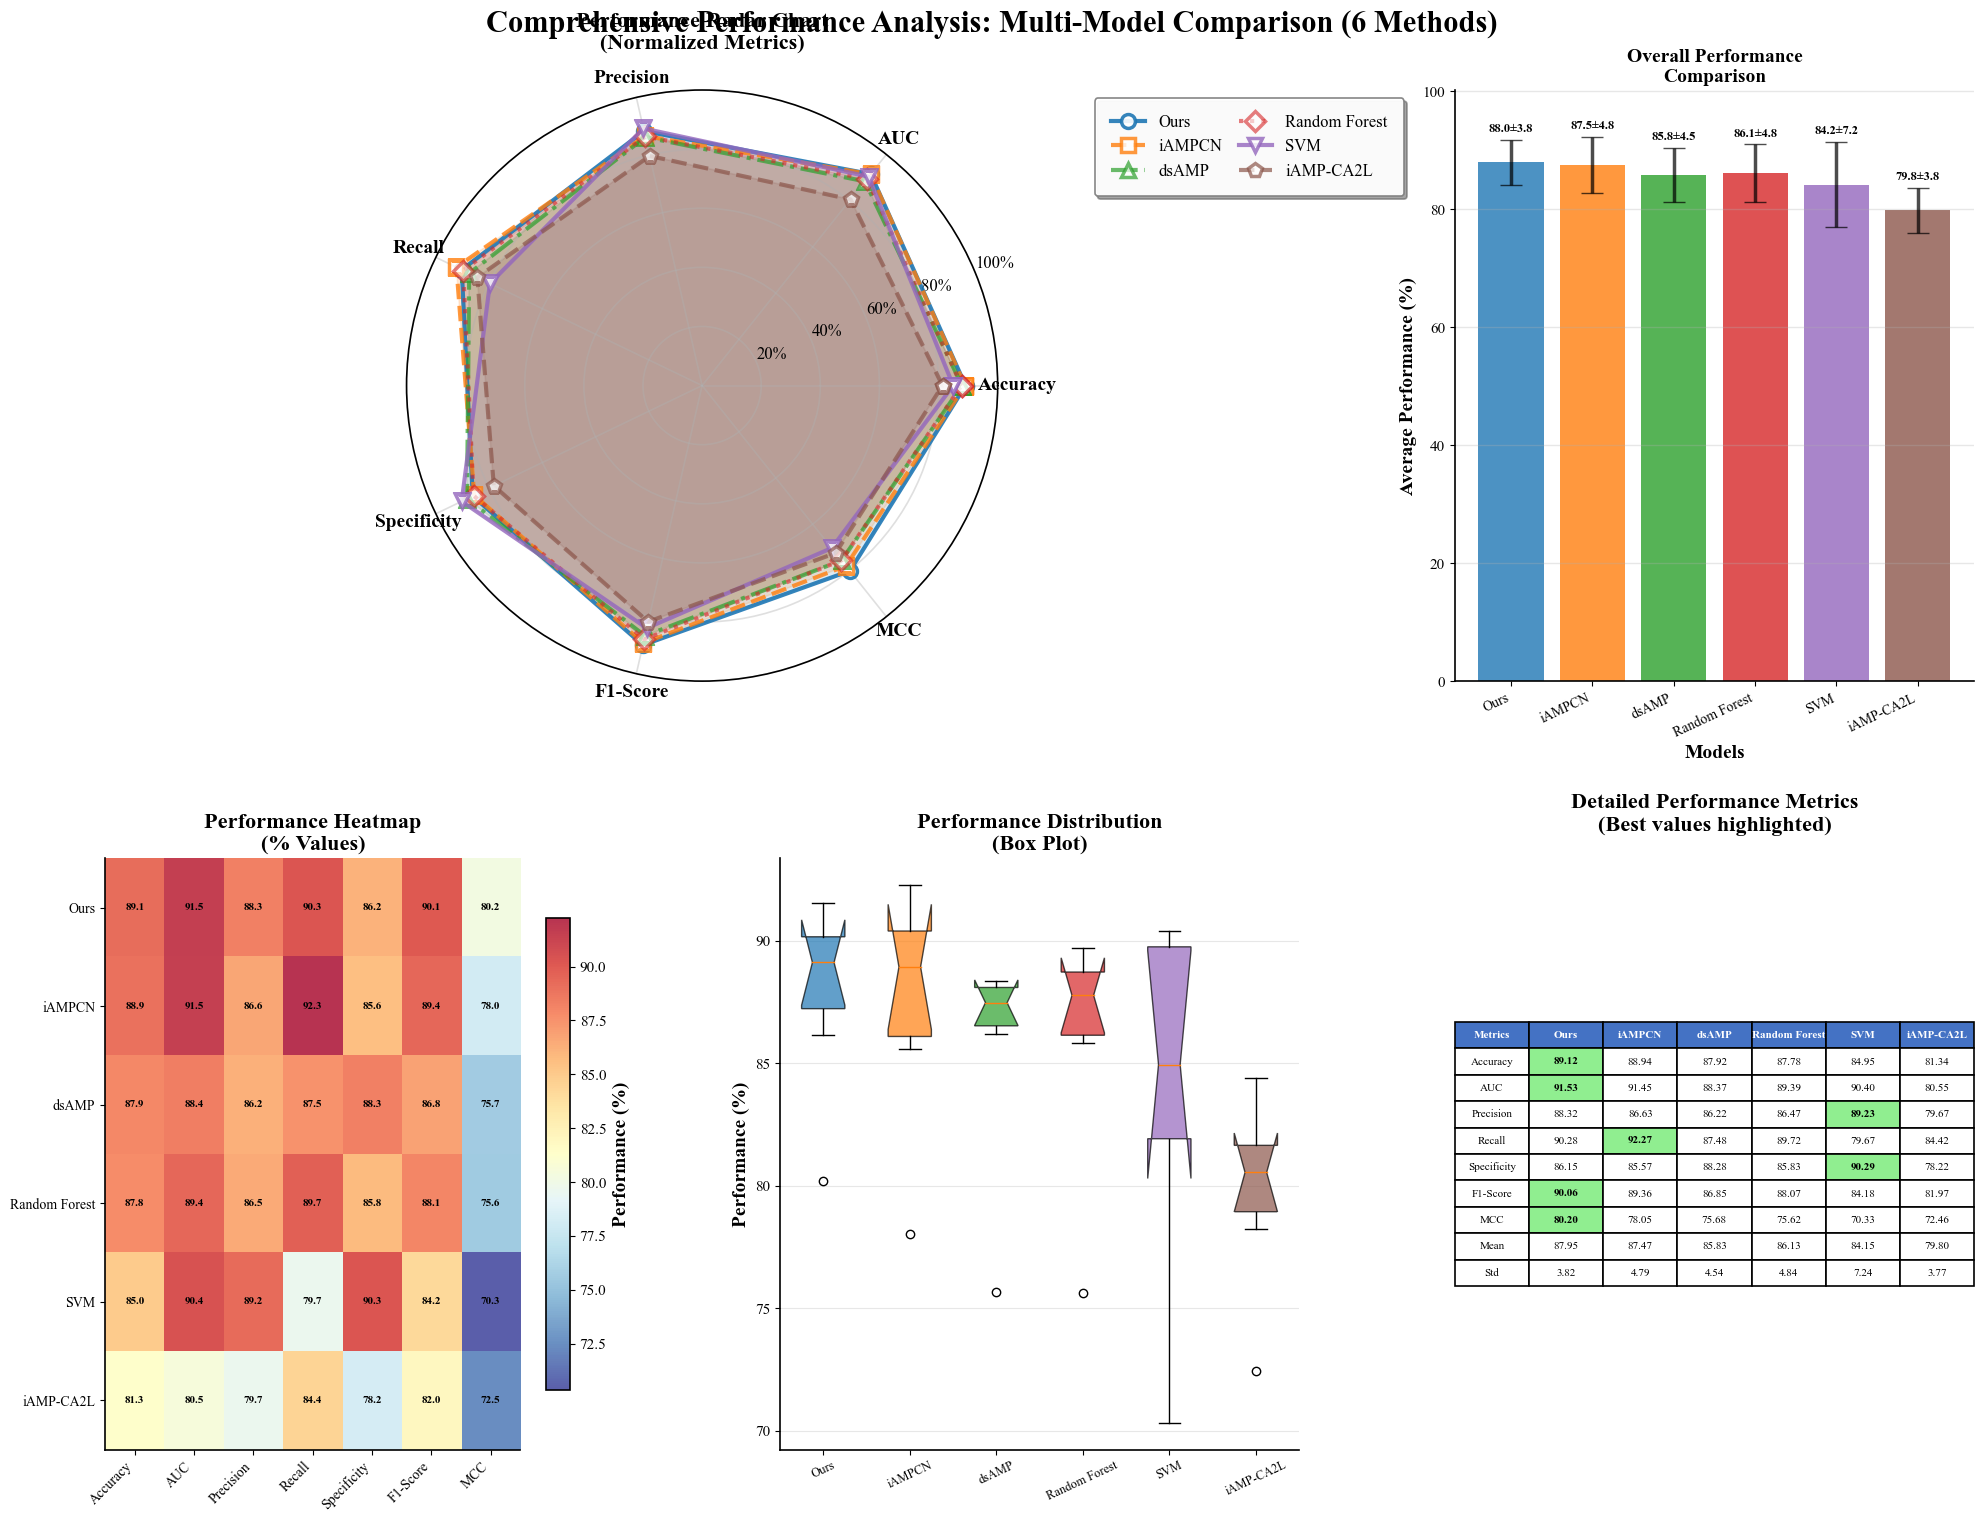


=== 统计显著性分析 ===
与我们方法的对比:
Ours vs iAMPCN: t=0.961, p=0.374, d=0.112 (小效应, 不显著)
Ours vs dsAMP: t=2.628, p=0.039, d=0.506 (中效应, 显著)
Ours vs Random Forest: t=3.442, p=0.014, d=0.419 (中效应, 显著)
Ours vs SVM: t=1.836, p=0.116, d=0.657 (中效应, 不显著)
Ours vs iAMP-CA2L: t=14.182, p=0.000, d=2.146 (大效应, 显著)

整体ANOVA检验: F=2.504, p=0.048
组间差异: 显著


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib.patches import Circle

# 设置科研级图表样式
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif'],
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'figure.titlesize': 18,
    'axes.linewidth': 1.2,
    'grid.linewidth': 0.8,
    'lines.linewidth': 2.5,
    'patch.linewidth': 1.2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'grid.alpha': 0.3
})

def plot_enhanced_radar_chart():
    """
    Enhanced radar chart for academic publication with statistical analysis
    """
    # 性能指标数据（包含AUC）
    categories = ['Accuracy', 'AUC', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'MCC']
    
    # 原始数据（百分比格式）- 完整6个方法对比
    models_data = {
        'Ours': [89.12, 91.53, 88.32, 90.28, 86.15, 90.06, 80.20],
        'iAMPCN': [88.94, 91.45, 86.63, 92.27, 85.57, 89.36, 78.05],
        'dsAMP': [87.92, 88.37, 86.22, 87.48, 88.28, 86.85, 75.68],
        'Random Forest': [87.78, 89.39, 86.47, 89.72, 85.83, 88.07, 75.62],
        'SVM': [84.95, 90.40, 89.23, 79.67, 90.29, 84.18, 70.33],
        'iAMP-CA2L': [81.34, 80.55, 79.67, 84.42, 78.22, 81.97, 72.46]
    }
    
    # 转换为0-1范围
    normalized_data = {model: [score/100 for score in scores] 
                      for model, scores in models_data.items()}
    
    # 统计分析
    df = pd.DataFrame(models_data, index=categories)
    mean_scores = df.mean(axis=0)
    std_scores = df.std(axis=0)
    
    print("=== 模型性能统计分析 ===")
    for i, model in enumerate(models_data.keys()):
        print(f"{model}: Mean={mean_scores.iloc[i]:.2f}±{std_scores.iloc[i]:.2f}")
    
    print(f"\n排序 (平均性能):")
    sorted_models = mean_scores.sort_values(ascending=False)
    for i, (model, score) in enumerate(sorted_models.items(), 1):
        print(f"{i}. {model}: {score:.2f}%")
    
    # 计算角度
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # 创建子图布局
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle('Comprehensive Performance Analysis: Multi-Model Comparison (6 Methods)', 
                 fontsize=22, fontweight='bold', y=0.95)
    
    # 主雷达图
    ax1 = plt.subplot(2, 3, (1, 2), projection='polar')
    
    # 科研级配色方案（6种颜色）
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  
    markers = ['o', 's', '^', 'D', 'v', 'p']  # 6种不同标记
    linestyles = ['-', '--', '-.', ':', '-', '--']
    alphas = [0.9, 0.8, 0.7, 0.6, 0.8, 0.7]
    
    # 绘制每个模型的数据
    for i, (model, scores) in enumerate(normalized_data.items()):
        values = scores + scores[:1]  # 闭合数据
        
        # 绘制线条和标记点
        line = ax1.plot(angles, values, markers[i], 
                       linestyle=linestyles[i], linewidth=3, 
                       markersize=10, color=colors[i], 
                       label=model, markerfacecolor='white', 
                       markeredgewidth=2.5, markeredgecolor=colors[i],
                       alpha=alphas[i])
        
        # 填充区域
        ax1.fill(angles, values, alpha=0.15, color=colors[i])
    
    # 设置雷达图属性
    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels(categories, fontsize=14, fontweight='bold')
    ax1.set_ylim(0, 1)
    ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax1.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=12)
    ax1.grid(True, alpha=0.4, linewidth=1.2)
    ax1.set_title('Performance Radar Chart\n(Normalized Metrics)', 
                  fontsize=16, fontweight='bold', pad=30)
    
    # 优化图例（6个方法）
    legend = ax1.legend(loc='upper left', bbox_to_anchor=(1.15, 1.0), 
                       frameon=True, fancybox=True, shadow=True,
                       borderpad=1, columnspacing=1, ncol=2)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_alpha(0.95)
    legend.get_frame().set_edgecolor('gray')
    
    # 性能对比柱状图 (修复参数)
    ax2 = plt.subplot(2, 3, 3)
    x_pos = np.arange(len(mean_scores))
    bars = ax2.bar(x_pos, mean_scores, yerr=std_scores, 
                   color=colors, alpha=0.8, capsize=8,
                   error_kw={'linewidth': 2.5, 'ecolor': 'black', 'alpha': 0.7})
    
    ax2.set_xlabel('Models', fontweight='bold', fontsize=14)
    ax2.set_ylabel('Average Performance (%)', fontweight='bold', fontsize=14)
    ax2.set_title('Overall Performance\nComparison', fontweight='bold', fontsize=14)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(mean_scores.index, rotation=25, ha='right', fontsize=10)
    ax2.grid(True, alpha=0.3, axis='y', linewidth=1)
    ax2.set_ylim(0, max(mean_scores) + max(std_scores) + 5)
    
    # 添加数值标签（调整位置以适应6个方法）
    for i, (bar, mean_val, std_val) in enumerate(zip(bars, mean_scores, std_scores)):
        ax2.text(bar.get_x() + bar.get_width()/2, mean_val + std_val + 0.8, 
                f'{mean_val:.1f}±{std_val:.1f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # 详细性能热图
    ax3 = plt.subplot(2, 3, 4)
    heatmap_data = np.array([models_data[model] for model in models_data.keys()])
    im = ax3.imshow(heatmap_data, cmap='RdYlBu_r', aspect='auto', alpha=0.8)
    
    # 设置热图标签
    ax3.set_xticks(range(len(categories)))
    ax3.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)
    ax3.set_yticks(range(len(models_data)))
    ax3.set_yticklabels(models_data.keys(), fontsize=10)
    ax3.set_title('Performance Heatmap\n(% Values)', fontweight='bold')
    
    # 添加数值到热图（调整字体大小）
    for i in range(len(models_data)):
        for j in range(len(categories)):
            text = ax3.text(j, i, f'{heatmap_data[i, j]:.1f}',
                           ha="center", va="center", color="black", fontweight='bold', fontsize=8)
    
    # 添加颜色条
    cbar = plt.colorbar(im, ax=ax3, shrink=0.8)
    cbar.set_label('Performance (%)', fontweight='bold')
    
    # 性能分布箱线图
    ax4 = plt.subplot(2, 3, 5)
    data_for_boxplot = [models_data[model] for model in models_data.keys()]
    bp = ax4.boxplot(data_for_boxplot, labels=models_data.keys(), 
                     patch_artist=True, notch=True)
    
    # 设置箱线图颜色
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax4.set_ylabel('Performance (%)', fontweight='bold')
    ax4.set_title('Performance Distribution\n(Box Plot)', fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y')
    ax4.tick_params(axis='x', rotation=25, labelsize=9)
    
    # 详细性能指标表格
    ax5 = plt.subplot(2, 3, 6)
    ax5.axis('tight')
    ax5.axis('off')
    
    # 创建表格数据
    table_data = []
    for i, category in enumerate(categories):
        row = [category]
        for model in models_data.keys():
            row.append(f"{models_data[model][i]:.2f}")
        table_data.append(row)
    
    # 添加统计行
    table_data.append(['Mean'] + [f"{mean_scores.iloc[i]:.2f}" for i in range(len(mean_scores))])
    table_data.append(['Std'] + [f"{std_scores.iloc[i]:.2f}" for i in range(len(std_scores))])
    
    table = ax5.table(cellText=table_data,
                     colLabels=['Metrics'] + list(models_data.keys()),
                     cellLoc='center',
                     loc='center',
                     colColours=['lightsteelblue']*(len(models_data)+1))
    
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1.0, 1.5)
    
    # 设置表格样式
    for i in range(len(table_data[0])):
        table[(0, i)].set_facecolor('#4472C4')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # 高亮最优值
    for i in range(len(categories)):
        row_vals = [models_data[model][i] for model in models_data.keys()]
        max_idx = np.argmax(row_vals)
        table[(i+1, max_idx+1)].set_facecolor('#90EE90')  # 浅绿色
        table[(i+1, max_idx+1)].set_text_props(weight='bold')
    
    ax5.set_title('Detailed Performance Metrics\n(Best values highlighted)', 
                  fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.90, hspace=0.3, wspace=0.3)
    plt.show()
    
    # 统计显著性检验（主要对比我们的方法与其他方法）
    print("\n=== 统计显著性分析 ===")
    our_scores = models_data['Ours']
    
    print("与我们方法的对比:")
    for model_name, scores in models_data.items():
        if model_name != 'Ours':
            try:
                t_stat, p_val = stats.ttest_rel(our_scores, scores)
                
                # 效应量计算 (Cohen's d)
                def cohens_d(x, y):
                    nx, ny = len(x), len(y)
                    dof = nx + ny - 2
                    pooled_std = np.sqrt(((nx-1)*np.var(x, ddof=1) + (ny-1)*np.var(y, ddof=1)) / dof)
                    return (np.mean(x) - np.mean(y)) / pooled_std
                
                d = cohens_d(our_scores, scores)
                effect_size = '小' if abs(d) < 0.2 else '中' if abs(d) < 0.8 else '大'
                significance = '显著' if p_val < 0.05 else '不显著'
                
                print(f"Ours vs {model_name}: t={t_stat:.3f}, p={p_val:.3f}, d={d:.3f} ({effect_size}效应, {significance})")
                
            except Exception as e:
                print(f"Ours vs {model_name}: 检验出错 - {e}")
    
    # 整体ANOVA检验
    try:
        from scipy.stats import f_oneway
        all_scores = [models_data[model] for model in models_data.keys()]
        f_stat, p_val_anova = f_oneway(*all_scores)
        print(f"\n整体ANOVA检验: F={f_stat:.3f}, p={p_val_anova:.3f}")
        print(f"组间差异: {'显著' if p_val_anova < 0.05 else '不显著'}")
    except Exception as e:
        print(f"ANOVA检验出错: {e}")
    
    return fig

# 调用增强版函数
enhanced_fig = plot_enhanced_radar_chart()

In [40]:
# 数据准备和统计分析
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# 设置科研级图表样式
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif'],
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'figure.titlesize': 18,
    'axes.linewidth': 1.2,
    'grid.linewidth': 0.8,
    'lines.linewidth': 2.5,
    'patch.linewidth': 1.2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'grid.alpha': 0.3
})

# 性能指标数据（包含AUC）
categories = ['Accuracy', 'AUC', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'MCC']

# 原始数据（百分比格式）- 完整6个方法对比
models_data = {
    'Amplify-G(Ours)': [89.12, 91.53, 88.32, 90.28, 86.15, 90.06, 80.20],
    'iAMPCN': [88.94, 91.45, 86.63, 92.27, 85.57, 89.36, 78.05],
    'dsAMP': [87.92, 88.37, 86.22, 87.48, 88.28, 86.85, 75.68],
    'Random Forest': [87.78, 89.39, 86.47, 89.72, 85.83, 88.07, 75.62],
    'SVM': [84.95, 90.40, 89.23, 79.67, 90.29, 84.18, 70.33],
    'iAMP-CA2L': [81.34, 80.55, 79.67, 84.42, 78.22, 81.97, 72.46]
}

# 转换为0-1范围
normalized_data = {model: [score/100 for score in scores] 
                  for model, scores in models_data.items()}

# 统计分析
df = pd.DataFrame(models_data, index=categories)
mean_scores = df.mean(axis=0)
std_scores = df.std(axis=0)

# 科研级配色方案（6种颜色）
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  
markers = ['o', 's', '^', 'D', 'v', 'p']  # 6种不同标记
linestyles = ['-', '--', '-.', ':', '-', '--']
alphas = [0.9, 0.8, 0.7, 0.6, 0.8, 0.7]

print("=== 模型性能统计分析 ===")
for i, model in enumerate(models_data.keys()):
    print(f"{model}: Mean={mean_scores.iloc[i]:.2f}±{std_scores.iloc[i]:.2f}")

print(f"\n排序 (平均性能):")
sorted_models = mean_scores.sort_values(ascending=False)
for i, (model, score) in enumerate(sorted_models.items(), 1):
    print(f"{i}. {model}: {score:.2f}%")

=== 模型性能统计分析 ===
Amplify-G(Ours): Mean=87.95±3.82
iAMPCN: Mean=87.47±4.79
dsAMP: Mean=85.83±4.54
Random Forest: Mean=86.13±4.84
SVM: Mean=84.15±7.24
iAMP-CA2L: Mean=79.80±3.77

排序 (平均性能):
1. Amplify-G(Ours): 87.95%
2. iAMPCN: 87.47%
3. Random Forest: 86.13%
4. dsAMP: 85.83%
5. SVM: 84.15%
6. iAMP-CA2L: 79.80%


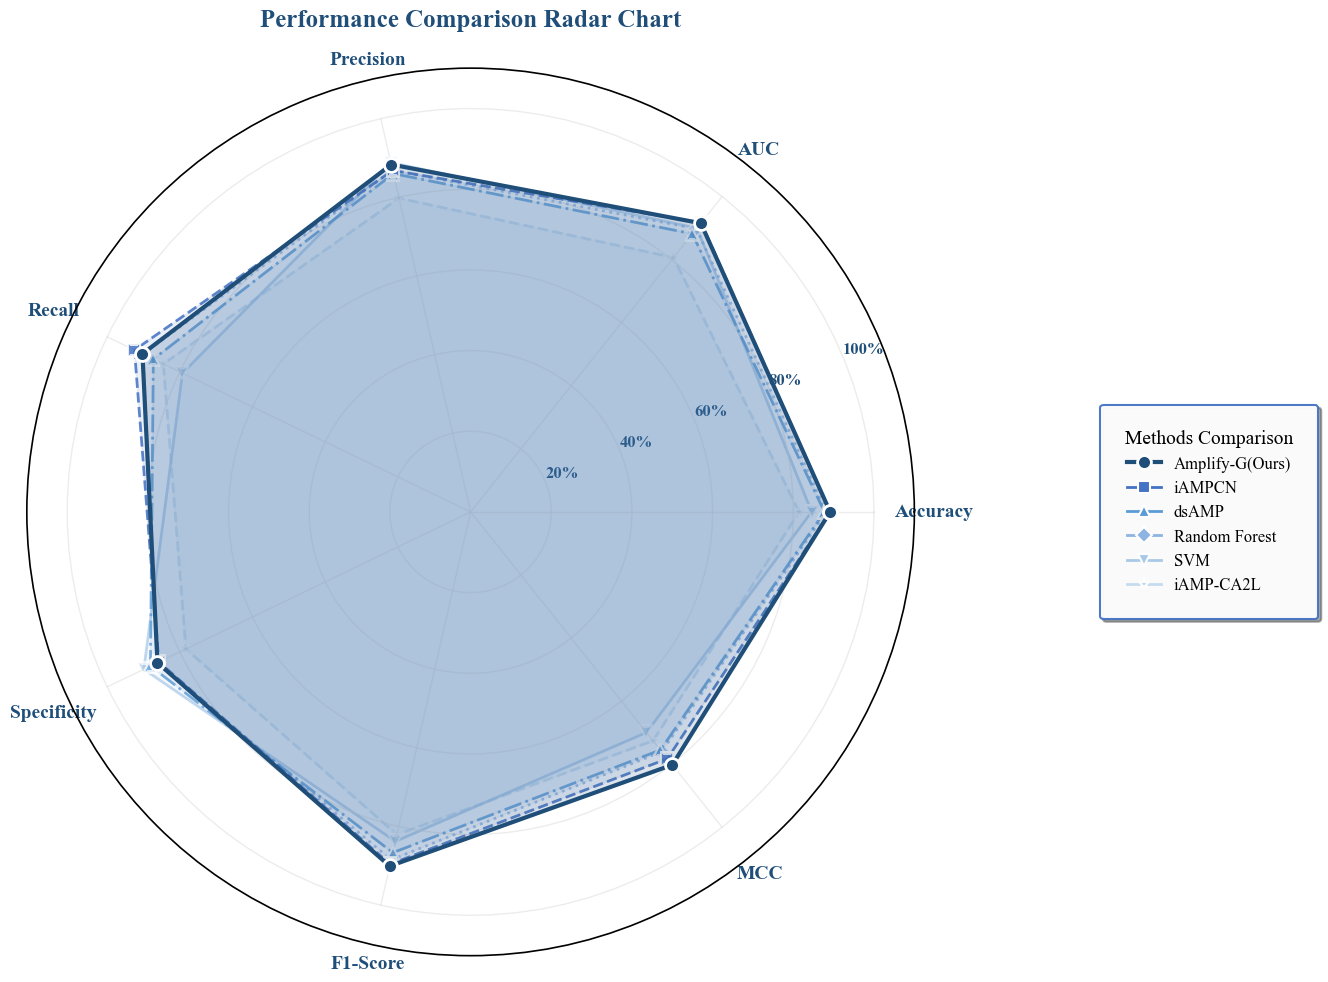

In [38]:
# 1. 雷达图 - 性能对比（白色主题优化版）
def plot_radar_chart_enhanced():
    """绘制白色主题的科研级雷达图"""
    
    # 计算角度
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # 创建更大的图形
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='polar')
    
    # 设置白色背景
    ax.set_facecolor('#ffffff')  # 白色背景
    
    # 蓝色主题配色方案 - 优雅且专业
    enhanced_colors = [
        '#1f4e79',  # 深蓝色 - Amplify-G (我们的方法)
        '#4472c4',  # 蓝色 - iAMPCN
        '#5b9bd5',  # 浅蓝色 - dsAMP  
        '#8db4e2',  # 更浅蓝色 - Random Forest
        '#a9c9e8',  # 淡蓝色 - SVM
        '#c5dbf0'   # 最淡蓝色 - iAMP-CA2L
    ]
    
    # 标记符号
    enhanced_markers = ['o', 's', '^', 'D', 'v', '*']
    
    # 线型样式
    enhanced_linestyles = ['-', '--', '-.', ':', '-', '--']
    
    # 适中的线宽度
    enhanced_linewidths = [2.5, 2.0, 2.0, 2.0, 2.0, 2.0]
    
    # 透明度
    enhanced_alphas = [1.0, 0.85, 0.8, 0.75, 0.7, 0.65]
    
    # 绘制网格（优雅的灰色主题）
    grid_levels = [0.2, 0.4, 0.6, 0.8, 1.0]
    for level in grid_levels:
        circle_angles = np.linspace(0, 2*np.pi, 100)
        ax.plot(circle_angles, [level]*100, color='#E0E0E0', alpha=0.6, linewidth=1)
    
    # 绘制放射状网格线
    for angle in angles[:-1]:
        ax.plot([angle, angle], [0, 1], color='#E0E0E0', alpha=0.6, linewidth=1)
    
    # 数据偏移量，防止线条完全重叠
    offset_values = [0.0, 0.002, -0.002, 0.004, -0.004, 0.001]
    
    model_keys = list(normalized_data.keys())
    
    # 绘制所有方法
    for i, model in enumerate(model_keys):
        scores = normalized_data[model]
        values = [score + offset_values[i] for score in scores] + [scores[0] + offset_values[i]]
        
        is_our_method = (model == 'Ours')
        
        ax.fill(angles, values, alpha=0.15 if is_our_method else 0.1, color=enhanced_colors[i], zorder=10 if is_our_method else 5-i)
        
        ax.plot(angles, values, 
               marker=enhanced_markers[i],
               linestyle=enhanced_linestyles[i], 
               linewidth=3.0 if is_our_method else enhanced_linewidths[i], 
               markersize=10 if is_our_method else 8, 
               color=enhanced_colors[i], 
               label=model, 
               markerfacecolor=enhanced_colors[i], 
               markeredgewidth=2 if is_our_method else 1.5, 
               markeredgecolor='white',
               alpha=enhanced_alphas[i],
               zorder=10 if is_our_method else 5-i)

    # 设置雷达图属性
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=14, fontweight='bold', color='#1f4e79')
    ax.set_ylim(0, 1.1)
    ax.set_yticks(grid_levels)
    ax.set_yticklabels([f'{int(level*100)}%' for level in grid_levels], 
                      fontsize=12, color='#1f4e79', fontweight='bold')
    
    ax.grid(False)
    
    ax.set_title('Performance Comparison Radar Chart', 
                fontsize=18, fontweight='bold', pad=30, color='#1f4e79')
    
    # 创建图例
    legend_elements = []
    for i, model in enumerate(model_keys):
        # **关键修改：在这里直接替换标签文本**
        label_text = 'Amplify-G(Ours)' if model == 'Ours' else model
        
        is_our_method = (model == 'Ours')
        
        legend_elements.append(plt.Line2D([0], [0], 
                                       marker=enhanced_markers[i], 
                                       color=enhanced_colors[i],
                                       label=label_text, 
                                       markersize=10 if is_our_method else 8, 
                                       linewidth=3.0 if is_our_method else enhanced_linewidths[i],
                                       markerfacecolor=enhanced_colors[i],
                                       markeredgecolor='white', 
                                       markeredgewidth=2 if is_our_method else 1.5))
    
    # 放置图例
    legend = ax.legend(handles=legend_elements, 
                      loc='center left', 
                      bbox_to_anchor=(1.2, 0.5), 
                      frameon=True, fancybox=True, shadow=True,
                      borderpad=1.5, fontsize=12,
                      title='Methods Comparison', title_fontsize=14)
    legend.get_frame().set_facecolor('#ffffff')
    legend.get_frame().set_alpha(0.95)
    legend.get_frame().set_edgecolor('#4472c4')
    legend.get_frame().set_linewidth(1.5)
    
    plt.tight_layout()
    plt.subplots_adjust(right=0.75)
    plt.show()

plot_radar_chart_enhanced()

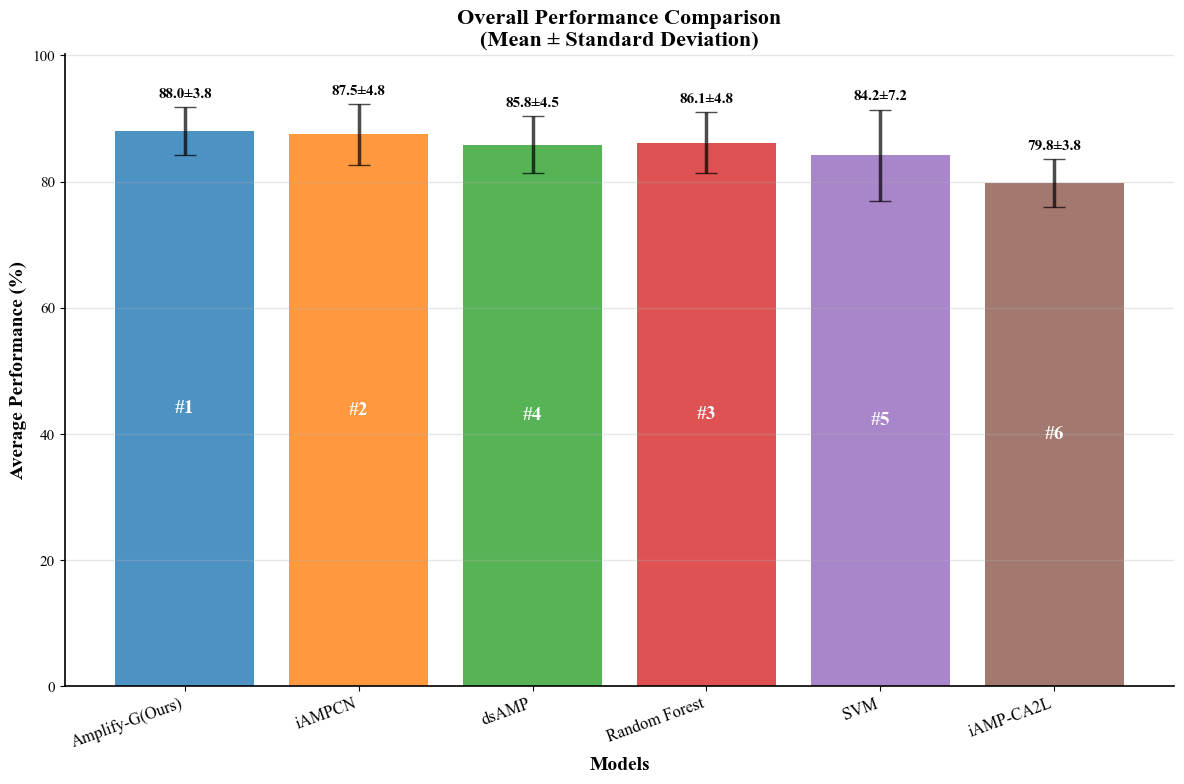

In [42]:
# 2. 柱状图 - 平均性能对比
def plot_bar_chart():
    """绘制平均性能柱状图"""
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    x_pos = np.arange(len(mean_scores))
    bars = ax.bar(x_pos, mean_scores, yerr=std_scores, 
                  color=colors, alpha=0.8, capsize=8,
                  error_kw={'linewidth': 2.5, 'ecolor': 'black', 'alpha': 0.7})
    
    ax.set_xlabel('Models', fontweight='bold', fontsize=14)
    ax.set_ylabel('Average Performance (%)', fontweight='bold', fontsize=14)
    ax.set_title('Overall Performance Comparison\n(Mean ± Standard Deviation)', 
                fontweight='bold', fontsize=16)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(mean_scores.index, rotation=20, ha='right', fontsize=12)
    ax.grid(True, alpha=0.3, axis='y', linewidth=1)
    ax.set_ylim(0, max(mean_scores) + max(std_scores) + 5)
    
    # 添加数值标签
    for i, (bar, mean_val, std_val) in enumerate(zip(bars, mean_scores, std_scores)):
        ax.text(bar.get_x() + bar.get_width()/2, mean_val + std_val + 1, 
                f'{mean_val:.1f}±{std_val:.1f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # 添加排名标注
    for i, (bar, mean_val) in enumerate(zip(bars, mean_scores)):
        rank = sorted_models.rank(ascending=False)[mean_scores.index[i]]
        ax.text(bar.get_x() + bar.get_width()/2, mean_val/2, 
                f'#{int(rank)}', 
                ha='center', va='center', fontweight='bold', 
                fontsize=14, color='white')
    
    plt.tight_layout()
    plt.show()

# 绘制柱状图
plot_bar_chart()

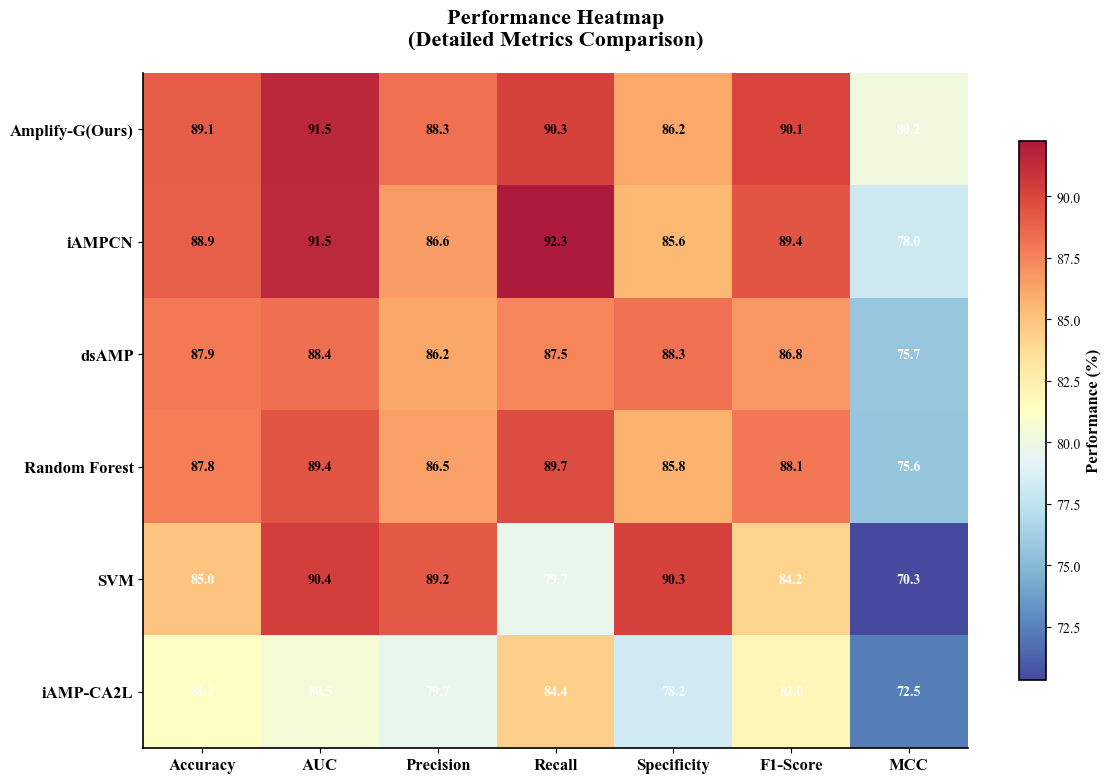

In [41]:
# 3. 热图 - 详细性能矩阵
def plot_heatmap():
    """绘制性能热图"""
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    heatmap_data = np.array([models_data[model] for model in models_data.keys()])
    im = ax.imshow(heatmap_data, cmap='RdYlBu_r', aspect='auto', alpha=0.9)
    
    # 设置热图标签
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, rotation=0, ha='center', fontsize=12, fontweight='bold')
    ax.set_yticks(range(len(models_data)))
    ax.set_yticklabels(models_data.keys(), fontsize=12, fontweight='bold')
    ax.set_title('Performance Heatmap\n(Detailed Metrics Comparison)', 
                fontweight='bold', fontsize=16, pad=20)
    
    # 添加数值到热图
    for i in range(len(models_data)):
        for j in range(len(categories)):
            color = 'white' if heatmap_data[i, j] < 85 else 'black'
            text = ax.text(j, i, f'{heatmap_data[i, j]:.1f}',
                          ha="center", va="center", color=color, 
                          fontweight='bold', fontsize=10)
    
    # 添加颜色条
    cbar = plt.colorbar(im, ax=ax, shrink=0.8, aspect=20)
    cbar.set_label('Performance (%)', fontweight='bold', fontsize=12)
    cbar.ax.tick_params(labelsize=10)
    
    
    plt.tight_layout()
    plt.show()

# 绘制热图
plot_heatmap()

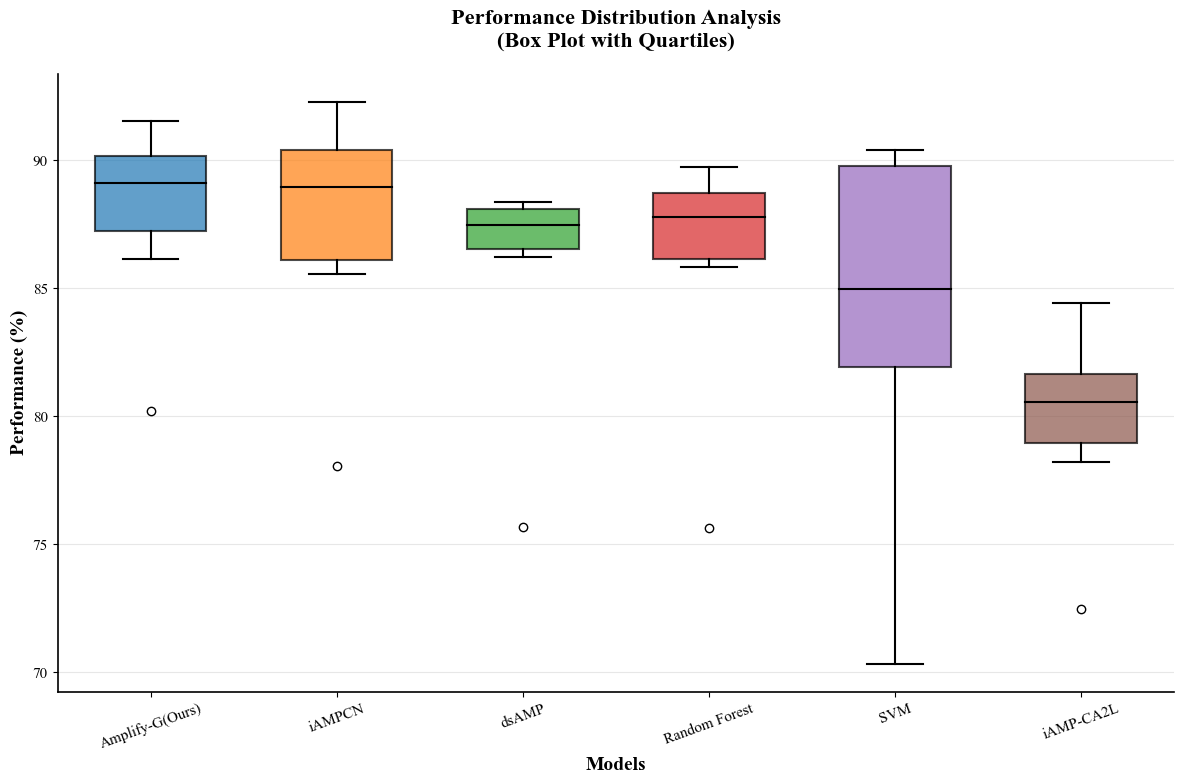

In [43]:
# 4. 箱线图 - 性能分布分析
def plot_boxplot():
    """绘制性能分布箱线图"""
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    data_for_boxplot = [models_data[model] for model in models_data.keys()]
    bp = ax.boxplot(data_for_boxplot, labels=models_data.keys(), 
                    patch_artist=True, notch=False, widths=0.6)
    
    # 设置箱线图颜色
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
        patch.set_edgecolor('black')
        patch.set_linewidth(1.5)
    
    # 设置其他元素颜色
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color='black', linewidth=1.5)
    
    ax.set_ylabel('Performance (%)', fontweight='bold', fontsize=14)
    ax.set_xlabel('Models', fontweight='bold', fontsize=14)
    ax.set_title('Performance Distribution Analysis\n(Box Plot with Quartiles)', 
                fontweight='bold', fontsize=16, pad=20)
    ax.grid(True, alpha=0.3, axis='y')
    ax.tick_params(axis='x', rotation=20, labelsize=11)
    
    plt.tight_layout()
    plt.show()

# 绘制箱线图
plot_boxplot()

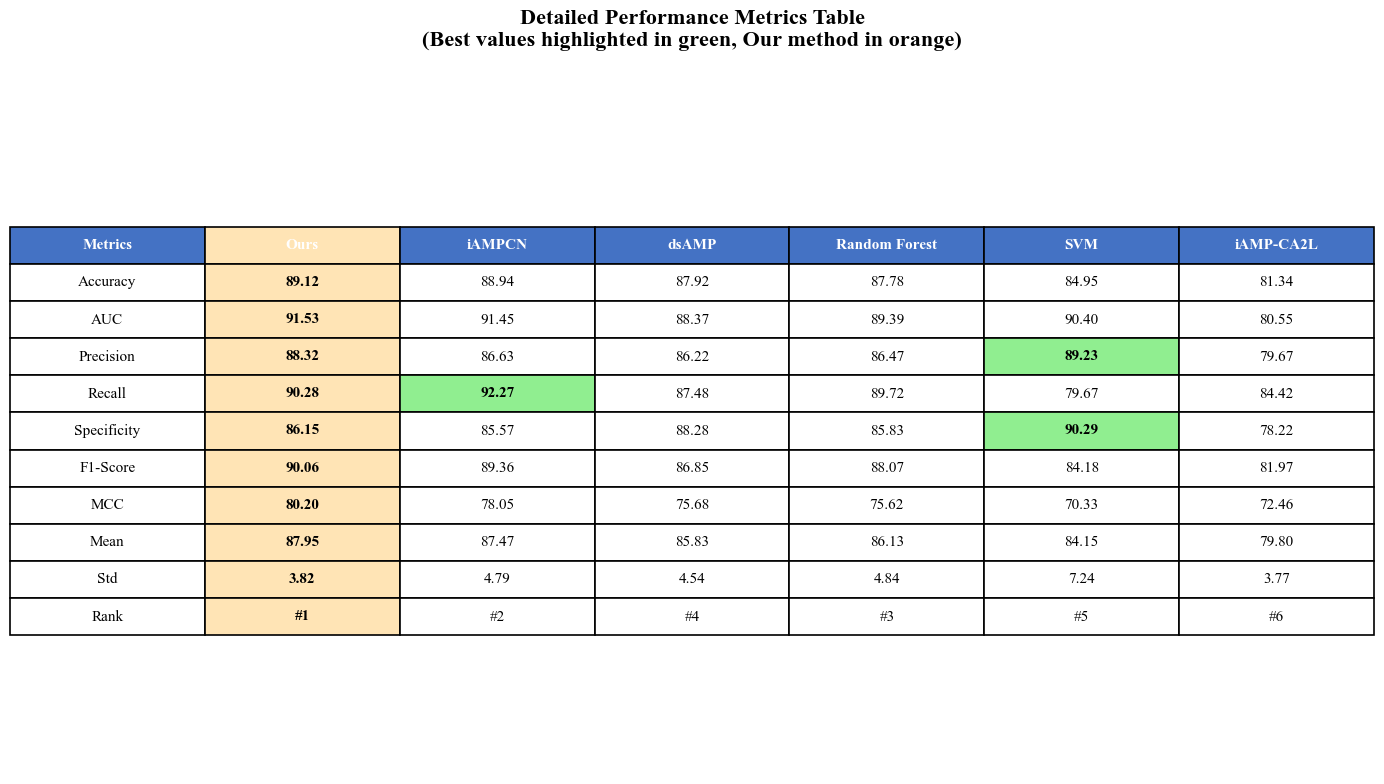

In [12]:
# 5. 数据表格 - 详细性能指标
def plot_table():
    """绘制详细性能指标表格"""
    
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.axis('tight')
    ax.axis('off')
    
    # 创建表格数据
    table_data = []
    for i, category in enumerate(categories):
        row = [category]
        for model in models_data.keys():
            row.append(f"{models_data[model][i]:.2f}")
        table_data.append(row)
    
    # 添加统计行
    table_data.append(['Mean'] + [f"{mean_scores.iloc[i]:.2f}" for i in range(len(mean_scores))])
    table_data.append(['Std'] + [f"{std_scores.iloc[i]:.2f}" for i in range(len(std_scores))])
    table_data.append(['Rank'] + [f"#{int(sorted_models.rank(ascending=False)[model])}" 
                                  for model in models_data.keys()])
    
    table = ax.table(cellText=table_data,
                     colLabels=['Metrics'] + list(models_data.keys()),
                     cellLoc='center',
                     loc='center',
                     colColours=['lightsteelblue']*(len(models_data)+1))
    
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1.0, 2.0)
    
    # 设置表格样式
    for i in range(len(table_data[0])):
        table[(0, i)].set_facecolor('#4472C4')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # 高亮最优值
    for i in range(len(categories)):
        row_vals = [models_data[model][i] for model in models_data.keys()]
        max_idx = np.argmax(row_vals)
        table[(i+1, max_idx+1)].set_facecolor('#90EE90')  # 浅绿色
        table[(i+1, max_idx+1)].set_text_props(weight='bold')
    
    # 高亮我们的方法列
    for i in range(len(table_data)+1):
        table[(i, 1)].set_facecolor('#FFE4B5')  # 浅橙色
        if i > 0:
            table[(i, 1)].set_text_props(weight='bold')
    
    ax.set_title('Detailed Performance Metrics Table\n(Best values highlighted in green, Our method in orange)', 
                fontweight='bold', fontsize=16, pad=30)
    
    plt.tight_layout()
    plt.show()

# 绘制表格
plot_table()

In [ ]:
# 6. 统计显著性分析
def statistical_analysis():
    """进行统计显著性分析"""
    
    print("="*60)
    print("📊 统计显著性分析报告")
    print("="*60)
    
    our_scores = models_data['Amplify-G']
    
    print("\n🔍 与我们方法的配对t检验对比:")
    print("-" * 50)
    
    significant_results = []
    for model_name, scores in models_data.items():
        if model_name != 'Amplify-G':
            try:
                t_stat, p_val = stats.ttest_rel(our_scores, scores)
                
                # 效应量计算 (Cohen's d)
                def cohens_d(x, y):
                    nx, ny = len(x), len(y)
                    dof = nx + ny - 2
                    pooled_std = np.sqrt(((nx-1)*np.var(x, ddof=1) + (ny-1)*np.var(y, ddof=1)) / dof)
                    return (np.mean(x) - np.mean(y)) / pooled_std
                
                d = cohens_d(our_scores, scores)
                effect_size = '小' if abs(d) < 0.2 else '中' if abs(d) < 0.8 else '大'
                significance = '✅ 显著' if p_val < 0.05 else '❌ 不显著'
                
                print(f"Amplify-G vs {model_name:12}: t={t_stat:6.3f}, p={p_val:6.3f}, d={d:6.3f} ({effect_size}效应, {significance})")
                
                if p_val < 0.05:
                    significant_results.append((model_name, p_val, d))
                
            except Exception as e:
                print(f"Amplify-G vs {model_name}: 检验出错 - {e}")
    
    # 整体ANOVA检验
    print("\n🔬 整体方差分析 (ANOVA):")
    print("-" * 30)
    try:
        from scipy.stats import f_oneway
        all_scores = [models_data[model] for model in models_data.keys()]
        f_stat, p_val_anova = f_oneway(*all_scores)
        anova_result = '✅ 显著' if p_val_anova < 0.05 else '❌ 不显著'
        print(f"F统计量: {f_stat:.3f}")
        print(f"p值: {p_val_anova:.3f}")
        print(f"组间差异: {anova_result}")
    except Exception as e:
        print(f"ANOVA检验出错: {e}")
    
    # 总结
    print(f"\n📈 结论总结:")
    print("-" * 20)
    print(f"• 我们的方法在 {len(significant_results)}/{len(models_data)-1} 个对比中显著优于其他方法")
    if significant_results:
        print("• 显著优于的方法:")
        for method, p_val, effect in significant_results:
            print(f"  - {method} (p={p_val:.3f}, Cohen's d={effect:.3f})")
    
    print(f"• 平均性能排名: #{int(sorted_models.rank(ascending=False)['Amplify-G'])}/6")
    print(f"• 性能稳定性: 标准差 = {std_scores['Amplify-G']:.2f} (越小越稳定)")

# 运行统计分析
statistical_analysis()

📊 统计显著性分析报告

🔍 与我们方法的配对t检验对比:
--------------------------------------------------
Ours vs iAMPCN      : t= 0.961, p= 0.374, d= 0.112 (小效应, ❌ 不显著)
Ours vs dsAMP       : t= 2.628, p= 0.039, d= 0.506 (中效应, ✅ 显著)
Ours vs Random Forest: t= 3.442, p= 0.014, d= 0.419 (中效应, ✅ 显著)
Ours vs SVM         : t= 1.836, p= 0.116, d= 0.657 (中效应, ❌ 不显著)
Ours vs iAMP-CA2L   : t=14.182, p= 0.000, d= 2.146 (大效应, ✅ 显著)

🔬 整体方差分析 (ANOVA):
------------------------------
F统计量: 2.504
p值: 0.048
组间差异: ✅ 显著

📈 结论总结:
--------------------
• 我们的方法在 3/5 个对比中显著优于其他方法
• 显著优于的方法:
  - dsAMP (p=0.039, Cohen's d=0.506)
  - Random Forest (p=0.014, Cohen's d=0.419)
  - iAMP-CA2L (p=0.000, Cohen's d=2.146)
• 平均性能排名: #1/6
• 性能稳定性: 标准差 = 3.82 (越小越稳定)
